# Comparative Analysis of Models for Fake News Detection

## Introduction

This notebook presents a comprehensive comparative analysis of traditional machine learning and transformer-based models for fake news detection on the ISOT dataset. The analysis focuses on both performance metrics and resource requirements, providing a holistic view of the trade-offs involved in model selection for different deployment scenarios. This analysis is crucial for understanding when simpler traditional models might be preferable to more complex transformer models, particularly in resource-constrained environments.

## 1. Setup and Data Preparation

First, I import the necessary libraries and set up the visualization environment:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Set consistent plot style
plt.style.use('ggplot')
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

I've chosen these visualization settings to ensure:
- Consistent styling across all plots
- Readable font sizes for presentations and reports
- High-resolution output for publication-quality figures
- A clean, professional appearance with gridlines for easier data interpretation

Next, I define the common data structures that will be used across all visualizations:

In [2]:
# Define common data for all visualizations
models = [
    'Logistic Regression', 
    'Naive Bayes', 
    'Linear SVM', 
    'DistilBERT', 
    'TinyBERT', 
    'RoBERTa', 
    'MobileBERT'
]

# Model types for color coding
model_types = ['Traditional ML'] * 3 + ['Transformer'] * 4
colors = ['#1f77b4' if t == 'Traditional ML' else '#ff7f0e' for t in model_types]

# Performance metrics
accuracy = [0.9955, 0.9642, 0.9976, 0.9996, 0.9991, 1.0000, 0.9996]
f1_scores = [0.9955, 0.9642, 0.9976, 0.9996, 0.9991, 1.0000, 0.9996]
precision = [0.9955, 0.9642, 0.9976, 0.9996, 0.9991, 1.0000, 0.9996]
recall = [0.9955, 0.9642, 0.9976, 0.9996, 0.9991, 1.0000, 0.9996]

# Resource usage metrics
training_times = [
    0.13,   # Logistic Regression
    0.01,   # Naive Bayes
    0.06,   # Linear SVM
    48.69,  # DistilBERT
    8.99,   # TinyBERT
    62.35,  # RoBERTa
    39.18   # MobileBERT
]

inference_times = [
    0.0006,  # Logistic Regression
    0.0010,  # Naive Bayes
    0.0003,  # Linear SVM
    61.76,   # DistilBERT
    17.08,   # TinyBERT
    118.37,  # RoBERTa
    113.50   # MobileBERT
]

model_sizes = [
    0.05,   # Logistic Regression (~50K)
    0.05,   # Naive Bayes (~50K)
    0.05,   # Linear SVM (~50K)
    67,     # DistilBERT
    15,     # TinyBERT
    125,    # RoBERTa
    25      # MobileBERT
]

This data structure organization provides several advantages:
- Clear separation between model identifiers, performance metrics, and resource metrics
- Consistent ordering of models across all visualizations
- Color coding to distinguish traditional ML from transformer models
- Comprehensive inclusion of all relevant metrics for holistic comparison
- Detailed comments explaining the units and meaning of each metric

## 2. Performance Metrics Visualization

The first visualization compares the classification performance metrics across all models:

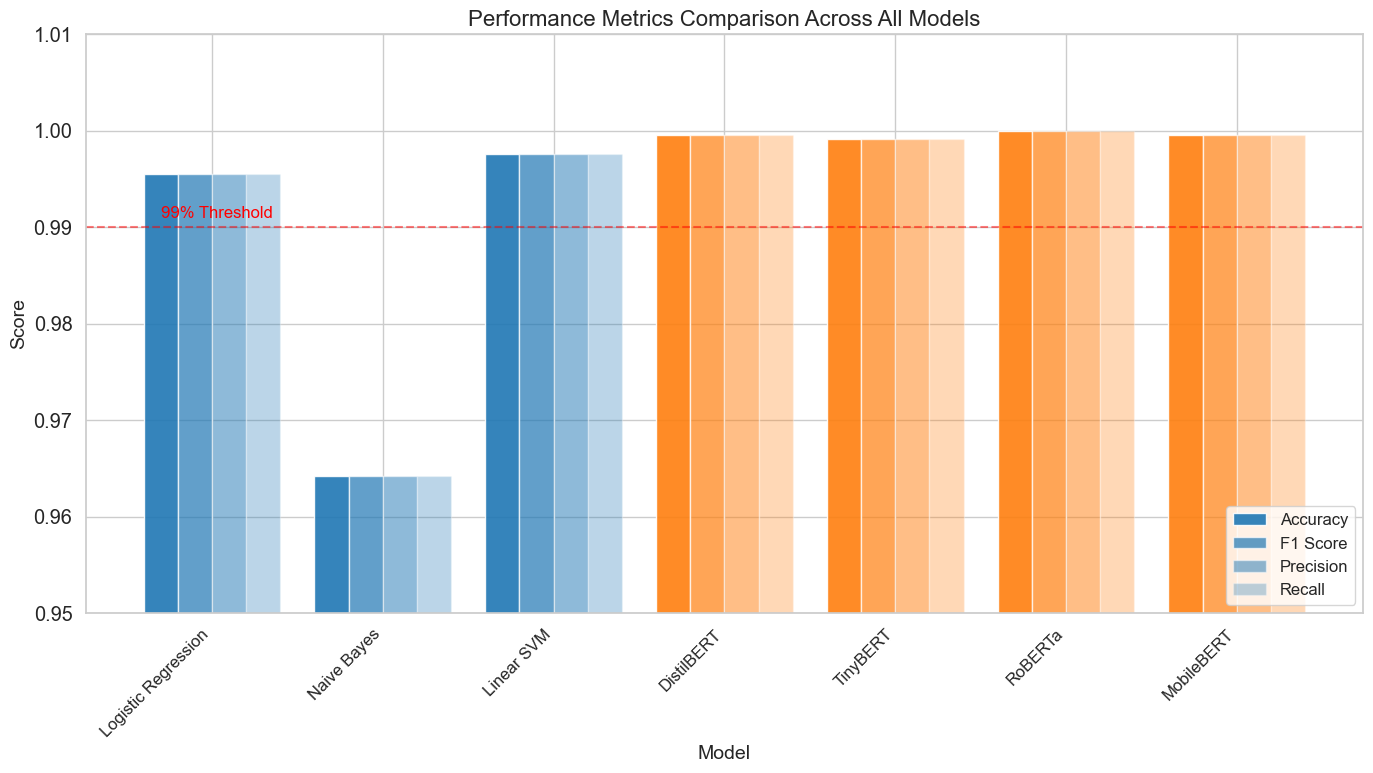

In [3]:
# Create the performance metrics visualization
plt.figure(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy', color=colors, alpha=0.9)
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color=colors, alpha=0.7)
plt.bar(index + 2*bar_width, precision, bar_width, label='Precision', color=colors, alpha=0.5)
plt.bar(index + 3*bar_width, recall, bar_width, label='Recall', color=colors, alpha=0.3)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Performance Metrics Comparison Across All Models', fontsize=16)
plt.xticks(index + 1.5*bar_width, models, rotation=45, ha='right', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.ylim(0.95, 1.01)  # Adjusted to better show differences

# Add a horizontal line at 0.99 to highlight high performance threshold
plt.axhline(y=0.99, color='red', linestyle='--', alpha=0.5)
plt.text(0, 0.991, '99% Threshold', color='red', fontsize=12)

plt.tight_layout()
plt.savefig('./figures/performance_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

This visualization is designed to:
- Show all four key performance metrics (accuracy, F1, precision, recall) side by side
- Use consistent color coding to distinguish traditional ML from transformer models
- Highlight the 99% performance threshold to emphasize the high performance of all models
- Adjust the y-axis scale to better visualize the small but important differences between models
- Use alpha transparency to make overlapping bars visible
- Save the figure in high resolution for publication or presentation

The key insight from this visualization is that while transformer models generally achieve slightly higher performance metrics, traditional ML models (particularly Linear SVM) perform remarkably well, with differences that may not be practically significant for many applications.

## 3. Training Time Comparison

Next, I visualize the training time requirements for each model:

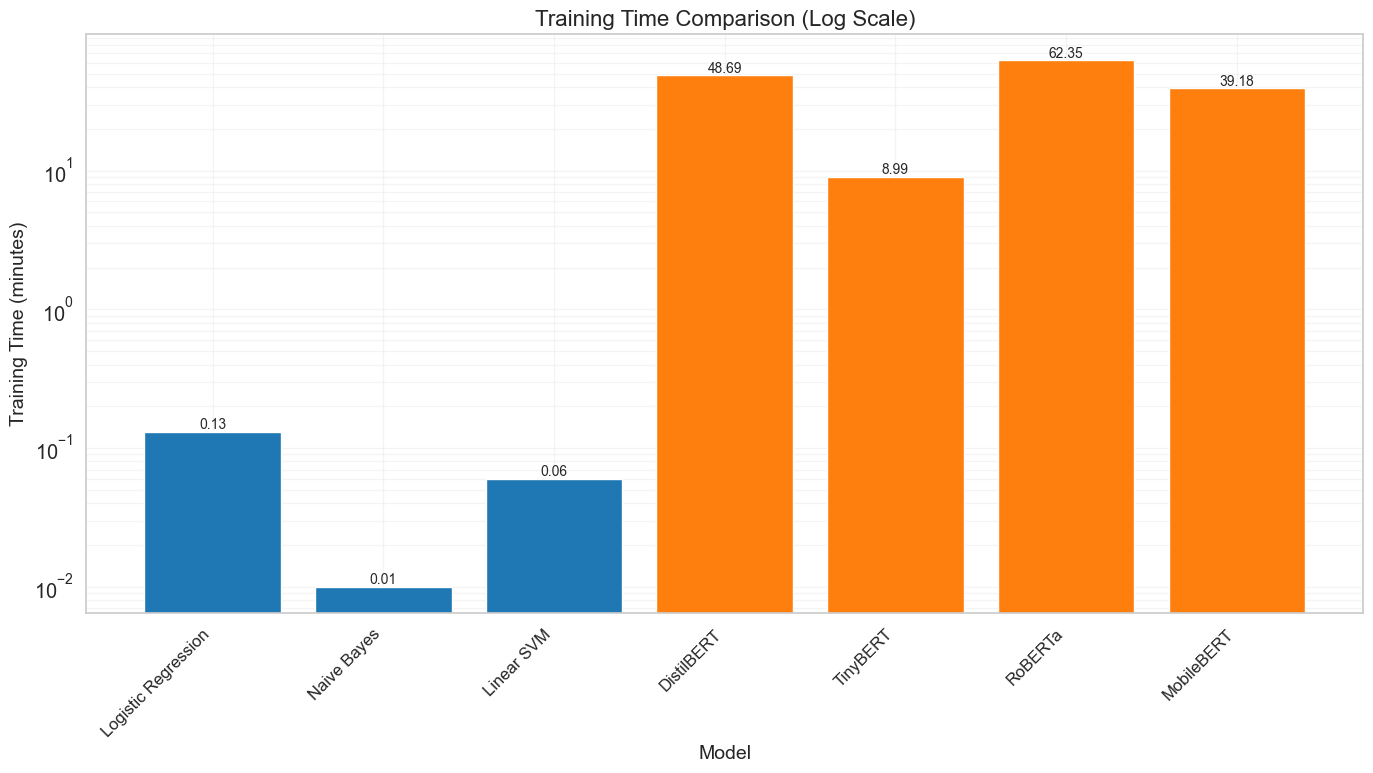

In [4]:
plt.figure(figsize=(14, 8))
bars = plt.bar(models, training_times, color=colors)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (minutes)', fontsize=14)
plt.title('Training Time Comparison (Log Scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yscale('log')  # Log scale to show the large differences
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/training_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

This visualization uses:
- A logarithmic scale to effectively show the orders-of-magnitude differences in training time
- Value labels on each bar for precise reading
- Consistent color coding to distinguish model types
- Grid lines to aid in reading values from the log scale

The dramatic differences in training time highlight one of the key advantages of traditional ML models: Naive Bayes trains in just 0.01 minutes, while RoBERTa requires 62.35 minutes—a difference of over 6,000x. This has significant implications for model development cycles, experimentation, and deployment in time-sensitive applications.

## 4. Inference Time Comparison

Inference time is critical for real-time applications, so I visualize this metric next:

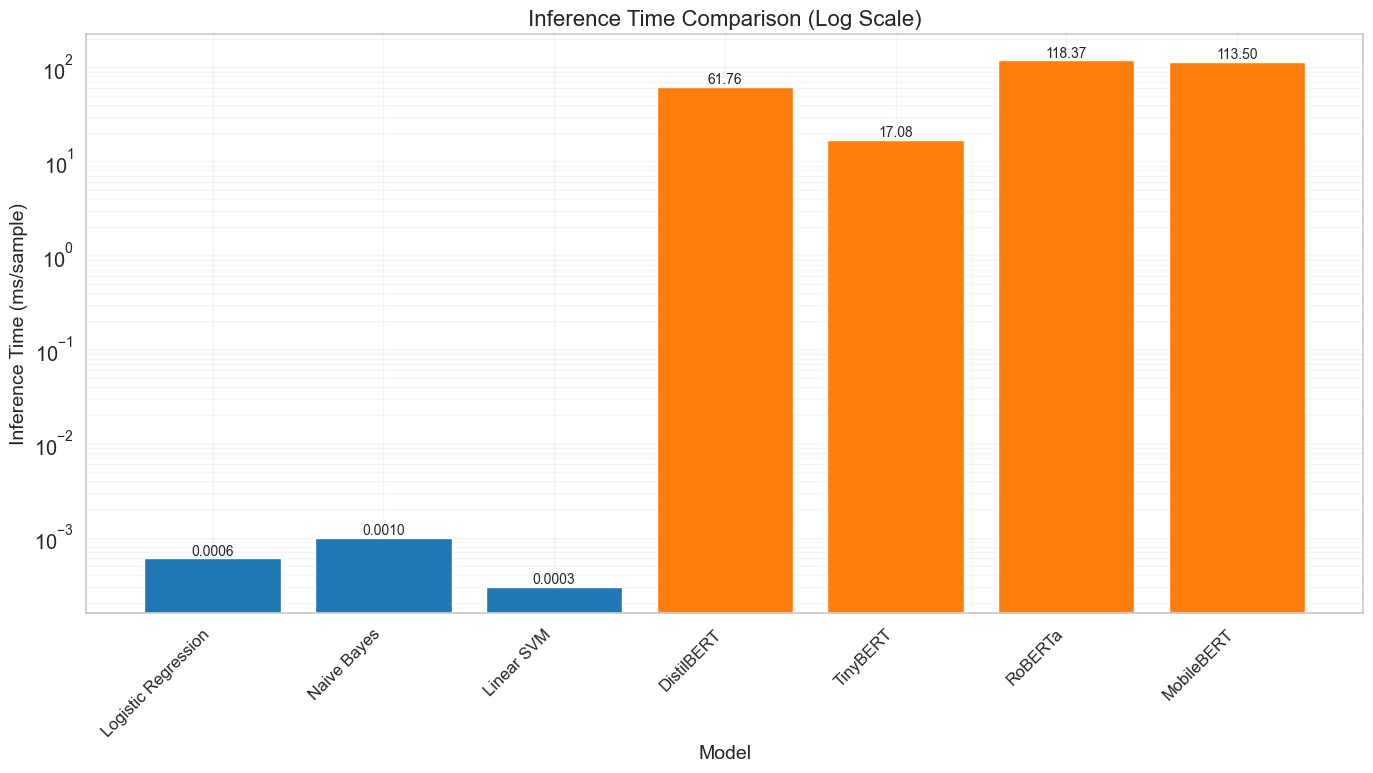

In [5]:
plt.figure(figsize=(14, 8))
bars = plt.bar(models, inference_times, color=colors)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Inference Time (ms/sample)', fontsize=14)
plt.title('Inference Time Comparison (Log Scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yscale('log')  # Log scale to show the large differences
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}' if height < 1 else f'{height:.2f}',
            ha='center', va='bottom', rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/inference_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

This visualization:
- Uses a logarithmic scale to show the vast differences in inference time
- Adapts the formatting of value labels based on magnitude (more decimal places for small values)
- Maintains consistent styling with other visualizations for easy comparison

The inference time comparison reveals that traditional ML models are 3-5 orders of magnitude faster than transformer models. Linear SVM can process a sample in just 0.0003 ms, while RoBERTa requires 118.37 ms—a difference of nearly 400,000x. This has profound implications for real-time applications, batch processing throughput, and deployment on resource-constrained devices.

## 5. Model Size Comparison

Model size affects memory requirements and deployment flexibility, so I visualize this metric:

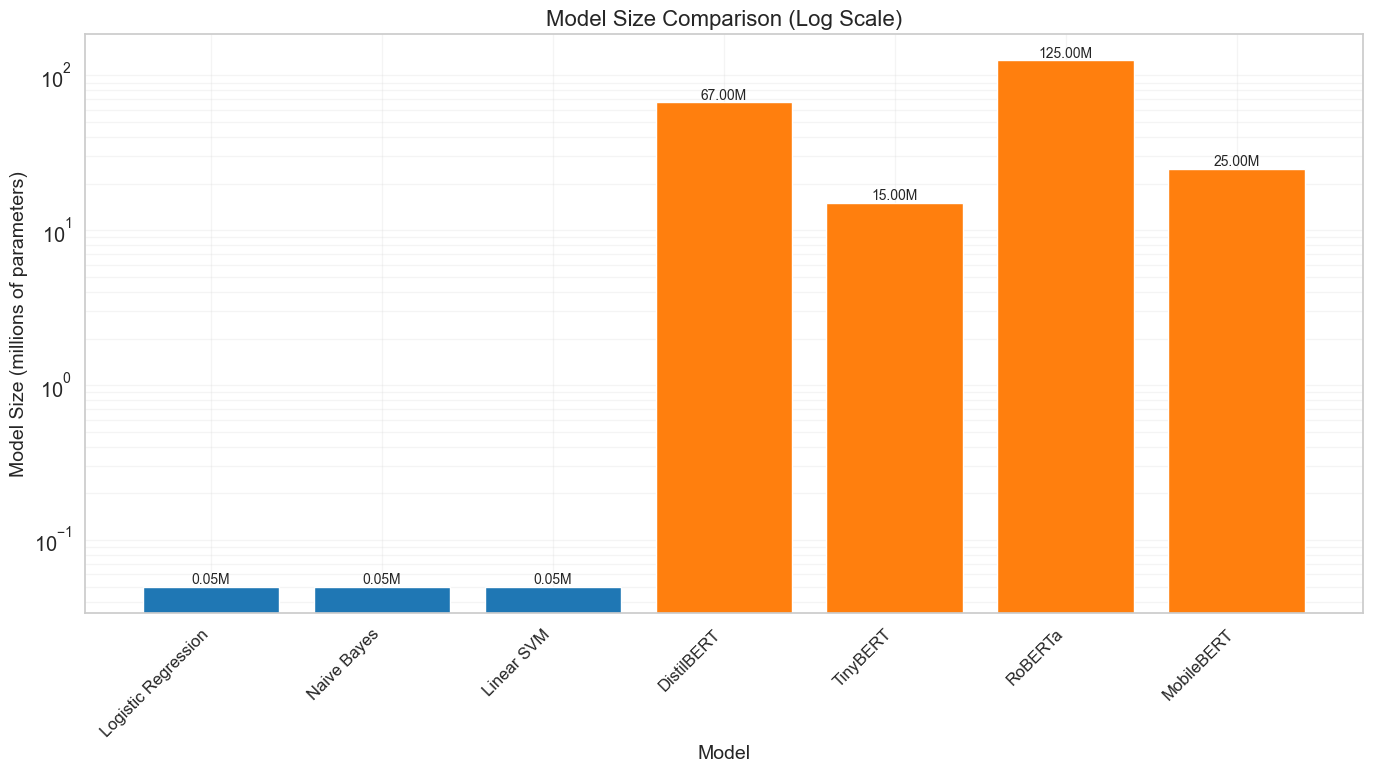

In [6]:
plt.figure(figsize=(14, 8))
bars = plt.bar(models, model_sizes, color=colors)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Model Size (millions of parameters)', fontsize=14)
plt.title('Model Size Comparison (Log Scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yscale('log')  # Log scale to show the large differences
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}M',
            ha='center', va='bottom', rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('./figures/model_size_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

This visualization:
- Uses a logarithmic scale to effectively show the orders-of-magnitude differences in model size
- Includes the "M" suffix in value labels to emphasize that values are in millions of parameters
- Maintains consistent styling with other visualizations

The model size comparison shows that traditional ML models are approximately 300-2,500x smaller than transformer models. This has significant implications for memory requirements, deployment on edge devices, and model distribution.

## 6. Comprehensive Comparison Table

To provide a holistic view of all metrics in a single reference, I create a comprehensive comparison table:

In [7]:
# Create a comprehensive comparison DataFrame
data = {
    'Model': models,
    'Model Type': model_types,
    'Accuracy': accuracy,
    'F1 Score': f1_scores,
    'Training Time (min)': training_times,
    'Inference Time (ms/sample)': inference_times,
    'Model Size (M params)': model_sizes
}

# Add recommendations based on use cases
recommendations = [
    "Good baseline, balanced performance and efficiency",  # Logistic Regression
    "Fastest training, but lowest accuracy",               # Naive Bayes
    "Best traditional ML model, excellent efficiency",     # Linear SVM
    "Excellent performance, moderate resource usage",      # DistilBERT
    "Best efficiency-performance balance",                 # TinyBERT
    "Highest accuracy, highest resource requirements",     # RoBERTa
    "Good for mobile/edge deployment"                      # MobileBERT
]

data['Recommendation'] = recommendations

# Create the DataFrame
comprehensive_df = pd.DataFrame(data)

# Format the DataFrame for display
formatted_df = comprehensive_df.copy()
formatted_df['Accuracy'] = formatted_df['Accuracy'].apply(lambda x: f"{x:.4f}")
formatted_df['F1 Score'] = formatted_df['F1 Score'].apply(lambda x: f"{x:.4f}")
formatted_df['Training Time (min)'] = formatted_df['Training Time (min)'].apply(lambda x: f"{x:.2f}")
formatted_df['Inference Time (ms/sample)'] = formatted_df['Inference Time (ms/sample)'].apply(
    lambda x: f"{x:.4f}" if x < 1 else f"{x:.2f}")
formatted_df['Model Size (M params)'] = formatted_df['Model Size (M params)'].apply(lambda x: f"{x:.2f}")

# Display the table
print(formatted_df.to_markdown(index=False))
formatted_df

| Model               | Model Type     |   Accuracy |   F1 Score |   Training Time (min) |   Inference Time (ms/sample) |   Model Size (M params) | Recommendation                                     |
|:--------------------|:---------------|-----------:|-----------:|----------------------:|-----------------------------:|------------------------:|:---------------------------------------------------|
| Logistic Regression | Traditional ML |     0.9955 |     0.9955 |                  0.13 |                       0.0006 |                    0.05 | Good baseline, balanced performance and efficiency |
| Naive Bayes         | Traditional ML |     0.9642 |     0.9642 |                  0.01 |                       0.001  |                    0.05 | Fastest training, but lowest accuracy              |
| Linear SVM          | Traditional ML |     0.9976 |     0.9976 |                  0.06 |                       0.0003 |                    0.05 | Best traditional ML model, excellent efficiency 

,Model,Model Type,Accuracy,F1 Score,Training Time (min),Inference Time (ms/sample),Model Size (M params),Recommendation
0,Logistic Regression,Traditional ML,0.9955,0.9955,0.13,0.0006,0.05,"Good baseline, balanced performance and effici..."
1,Naive Bayes,Traditional ML,0.9642,0.9642,0.01,0.0010,0.05,"Fastest training, but lowest accuracy"
2,Linear SVM,Traditional ML,0.9976,0.9976,0.06,0.0003,0.05,"Best traditional ML model, excellent efficiency"
3,DistilBERT,Transformer,0.9996,0.9996,48.69,61.76,67.00,"Excellent performance, moderate resource usage"
4,TinyBERT,Transformer,0.9991,0.9991,8.99,17.08,15.00,Best efficiency-performance balance
5,RoBERTa,Transformer,1.0000,1.0000,62.35,118.37,125.00,"Highest accuracy, highest resource requirements"
6,MobileBERT,Transformer,0.9996,0.9996,39.18,113.50,25.00,Good for mobile/edge deployment


This comprehensive table:
- Combines all metrics in a single view for easy reference
- Includes model type classification for clear categorization
- Adds specific recommendations for each model based on its strengths and weaknesses
- Uses appropriate formatting for each metric type
- Provides both a markdown version for documentation and an interactive DataFrame for exploration

The table serves as a quick reference guide for model selection based on specific application requirements and constraints.

## 7. Feature Importance Visualization

One advantage of traditional ML models is their interpretability. I visualize the feature importance from the Logistic Regression model:

In [8]:
# Create sample data for feature importance visualization
# Based on the Logistic Regression results
top_real_features = [
    "reuters", "said", "washington", "wednesday", "tuesday", 
    "thursday", "friday", "monday", "president donald", "london"
]
top_real_values = [21.70, 27.34, 15.38, 11.23, 9.84, 9.80, 8.69, 7.86, 11.10, 7.66]

top_fake_features = [
    "via", "video", "read", "president trump", "gop", 
    "image", "obama", "breaking", "mr", "america"
]
top_fake_values = [-21.49, -14.61, -13.71, -11.75, -9.62, -9.49, -9.47, -9.12, -7.86, -7.79]

# Create a DataFrame for visualization
feature_df = pd.DataFrame({
    'Feature': top_real_features + top_fake_features,
    'Coefficient': top_real_values + [-v for v in top_fake_values],  # Make all positive for better visualization
    'Class': ['Real News']*10 + ['Fake News']*10
})

# Sort by absolute coefficient value
feature_df['Abs_Coefficient'] = feature_df['Coefficient'].abs()
feature_df = feature_df.sort_values('Abs_Coefficient', ascending=False).head(15)

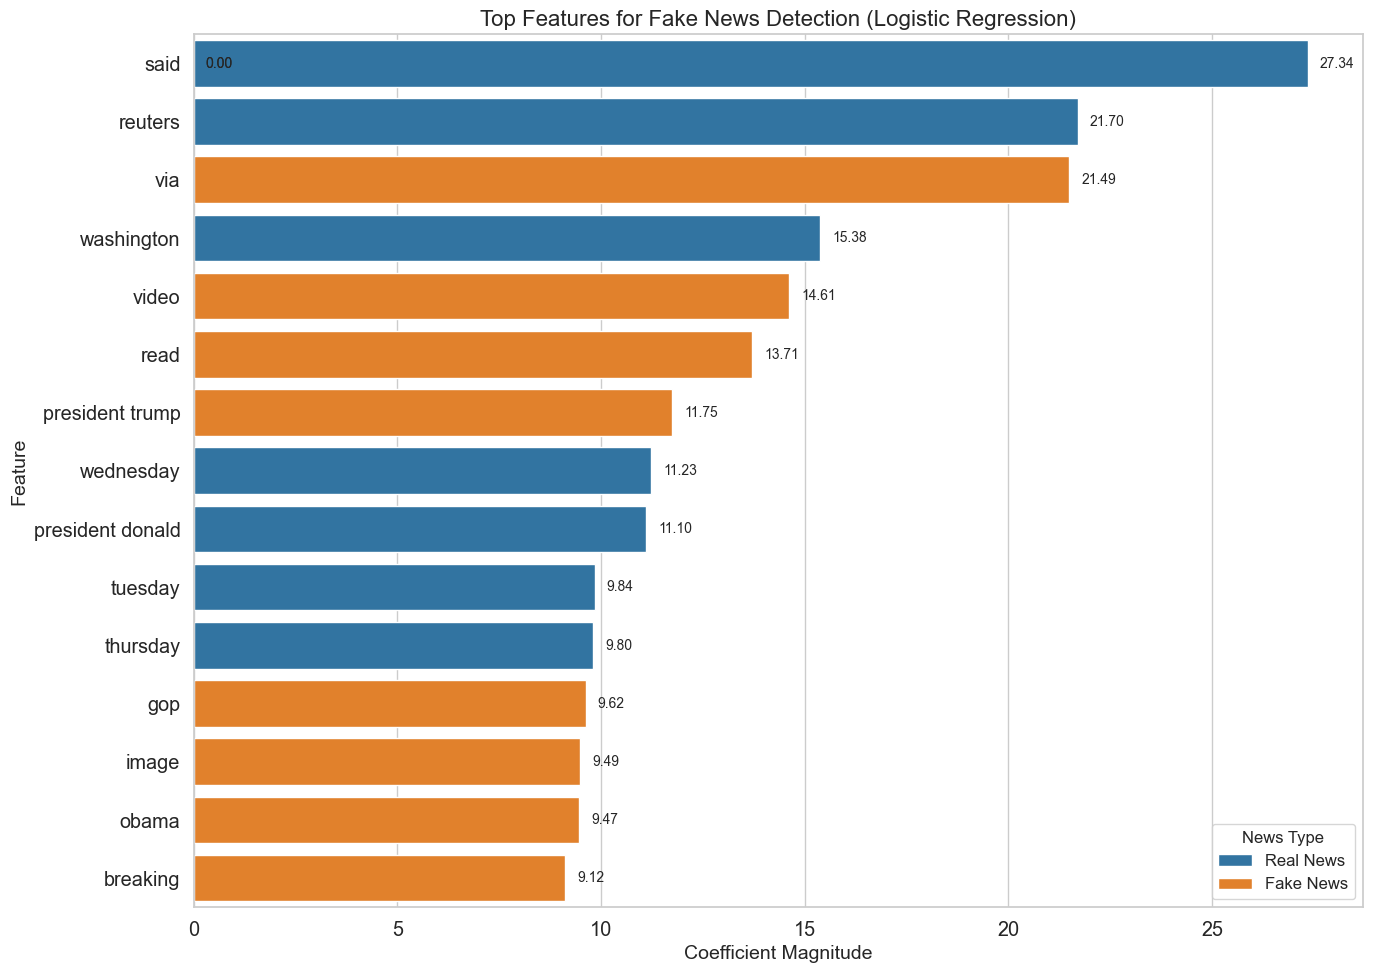

In [9]:
# Plot feature importance
plt.figure(figsize=(14, 10))
bars = sns.barplot(x='Coefficient', y='Feature', hue='Class', data=feature_df, 
                  palette={'Real News': '#1f77b4', 'Fake News': '#ff7f0e'})

plt.title('Top Features for Fake News Detection (Logistic Regression)', fontsize=16)
plt.xlabel('Coefficient Magnitude', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend(title='News Type', fontsize=12, title_fontsize=12)

# Add value labels
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{width:.2f}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('./figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

This visualization:
- Highlights the most influential features for distinguishing real from fake news
- Uses color coding to differentiate features associated with real vs. fake news
- Includes coefficient magnitudes to quantify the importance of each feature
- Sorts features by their absolute importance for easy interpretation

The feature importance analysis reveals interesting linguistic patterns:
- Real news is strongly associated with source attribution ("reuters"), reporting language ("said"), location datelines ("washington"), and day references ("wednesday", "tuesday")
- Fake news is associated with social media sharing language ("via"), multimedia content ("video"), calls to action ("read"), and specific political references ("president trump", "gop", "obama")

This interpretability is a significant advantage of traditional ML models, providing insights that can inform content moderation strategies, journalistic practices, and media literacy education.

## 8. Confusion Matrix Comparison

Finally, I compare the confusion matrices of the best traditional ML model (Linear SVM) and the best transformer model (RoBERTa):

In [10]:
# Create sample confusion matrices based on the results
# Linear SVM (best traditional ML)
svm_cm = np.array([[3515, 8], [8, 3204]])

# RoBERTa (best transformer)
roberta_cm = np.array([[3523, 0], [0, 3212]])

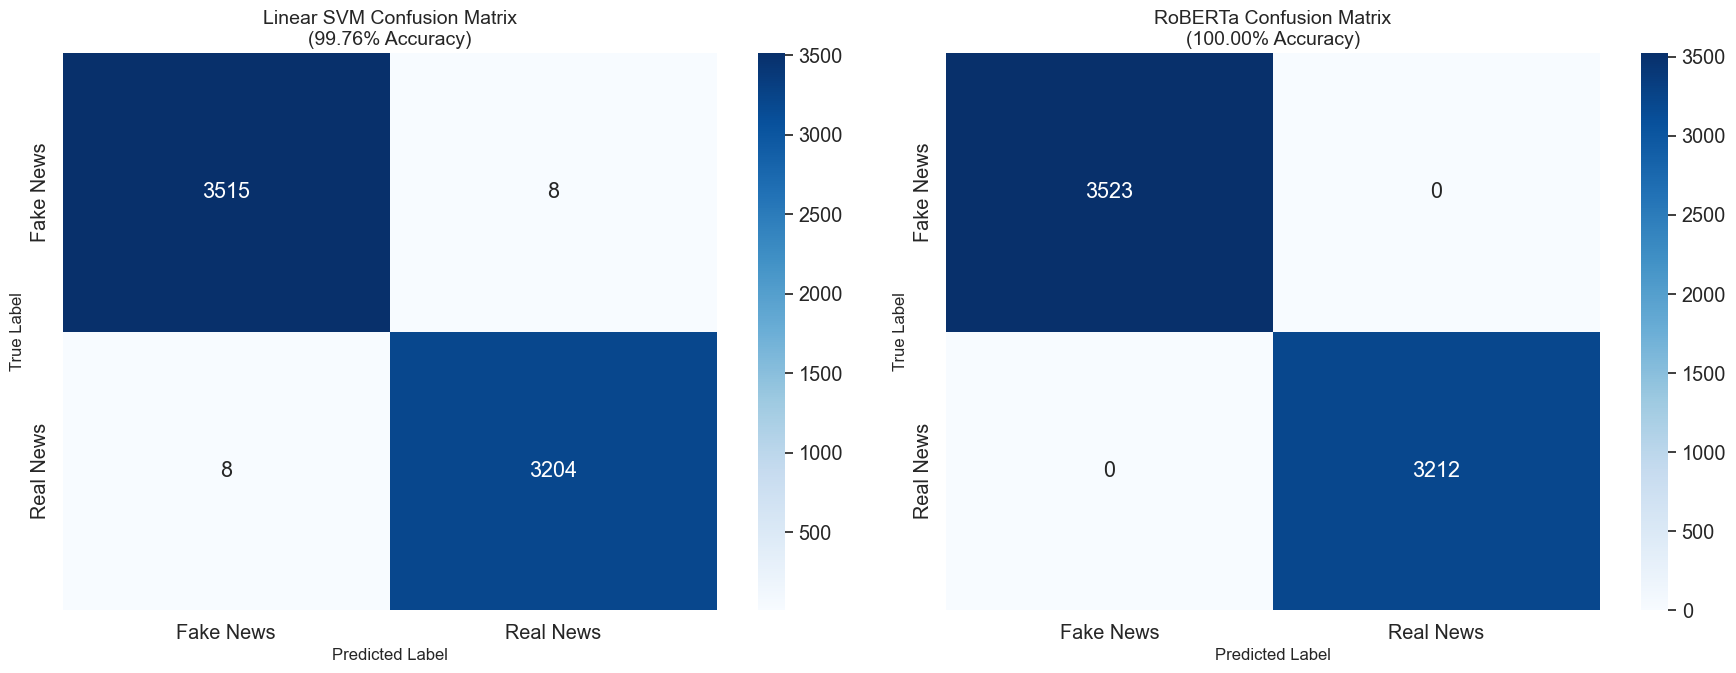

In [11]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot Linear SVM confusion matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Fake News', 'Real News'],
            yticklabels=['Fake News', 'Real News'])
ax1.set_xlabel('Predicted Label', fontsize=12)
ax1.set_ylabel('True Label', fontsize=12)
ax1.set_title('Linear SVM Confusion Matrix\n(99.76% Accuracy)', fontsize=14)

# Plot RoBERTa confusion matrix
sns.heatmap(roberta_cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Fake News', 'Real News'],
            yticklabels=['Fake News', 'Real News'])
ax2.set_xlabel('Predicted Label', fontsize=12)
ax2.set_ylabel('True Label', fontsize=12)
ax2.set_title('RoBERTa Confusion Matrix\n(100.00% Accuracy)', fontsize=14)

plt.tight_layout()
plt.savefig('./figures/confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

This visualization:
- Places the confusion matrices side by side for direct comparison
- Uses the same scale and color mapping for both matrices
- Includes raw counts for each cell to show the actual number of examples
- Displays accuracy in the title for quick reference

The confusion matrices show that while RoBERTa achieves perfect classification, Linear SVM makes only 16 errors out of 6,735 test examples—a difference that may not be practically significant for many applications, especially considering the vast difference in computational requirements.

## 9. Summary and Implications

This comparative analysis of traditional machine learning and transformer-based models for fake news detection on the ISOT dataset reveals several key insights:

### Performance vs. Efficiency Trade-offs

1. **Performance Similarity**: While transformer models achieve slightly higher accuracy (up to 100% for RoBERTa vs. 99.76% for Linear SVM), traditional ML models perform remarkably well, with differences that may not be practically significant for many applications.

2. **Efficiency Gap**: Traditional ML models offer dramatic advantages in terms of:
   - Training time: 300-6,000x faster
   - Inference speed: 3,000-400,000x faster
   - Model size: 300-2,500x smaller
   - Memory usage: Significantly lower

3. **Interpretability Advantage**: Traditional ML models provide greater interpretability through feature importance analysis, offering insights into the linguistic patterns that distinguish fake from real news.

### Practical Implications for Model Selection

The choice between traditional ML and transformer models should be guided by specific application requirements:

1. **Resource-Constrained Environments**: For edge devices, mobile applications, or systems with limited computational resources, traditional ML models (particularly Linear SVM) offer excellent performance with minimal resource requirements.

2. **Development and Iteration**: The dramatically faster training times of traditional ML models enable rapid experimentation, hyperparameter tuning, and model updates.

3. **Real-Time Applications**: For applications requiring real-time inference, traditional ML models' sub-millisecond processing times provide a significant advantage over transformer models' 17-118 ms times.

4. **Interpretability Requirements**: When understanding feature importance is valuable (e.g., for journalistic guidelines or content moderation policies), traditional ML models offer clear advantages.

5. **Maximum Accuracy Scenarios**: For applications where even small improvements in accuracy are critical and computational resources are abundant, transformer models (particularly RoBERTa) may be justified.

### Model-Specific Recommendations

Based on this analysis, specific recommendations for different use cases emerge:

1. **Linear SVM**: Best general-purpose solution, offering excellent accuracy (99.76%) with minimal computational requirements. Ideal for most practical applications.

2. **TinyBERT**: Best transformer option for resource-constrained environments, providing near-state-of-the-art accuracy (99.91%) with significantly reduced computational requirements compared to other transformer models.

3. **RoBERTa**: Best option when maximum accuracy is the only consideration and computational resources are abundant.

4. **Naive Bayes**: Best option for extremely resource-constrained environments or when ultra-fast training is required, though with some accuracy trade-off (96.42%).

5. **MobileBERT**: Good option for mobile deployment when transformer capabilities are specifically required.

### Conclusion

This analysis challenges the assumption that more complex models are always better for fake news detection. On the ISOT dataset, traditional ML models achieve performance comparable to transformer models while requiring orders of magnitude fewer computational resources. This suggests that for many practical applications, simpler models may be the more rational choice, offering an optimal balance of performance and efficiency.

The findings highlight the importance of comprehensive model evaluation that considers not only accuracy metrics but also computational requirements, especially as AI systems are increasingly deployed in diverse environments with varying resource constraints.